In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
agreements = pd.read_pickle("../extraction_pipeline/agreement_features_join_projects.pkl")

In [38]:
agreements['year'] = agreements.date.apply(lambda x: x.year)

In [40]:
sector_proportions = agreements.groupby('year')['predicted_sector'].value_counts(normalize=True)

In [41]:
years = range(1990,2020)
sectors = list(agreements.predicted_sector.value_counts().index)

In [43]:
sector_prop_plot = np.zeros((len(sectors),len(years)))
for i, sector in enumerate(sectors):
    for j, year in enumerate(years):
        if sector in sector_proportions[year].index:
            sector_prop_plot[i,j] = sector_proportions[year][sector]
        else:
            sector_prop_plot[i,j] = 0

In [44]:
colorscheme = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
colorscheme = list(reversed(colorscheme))

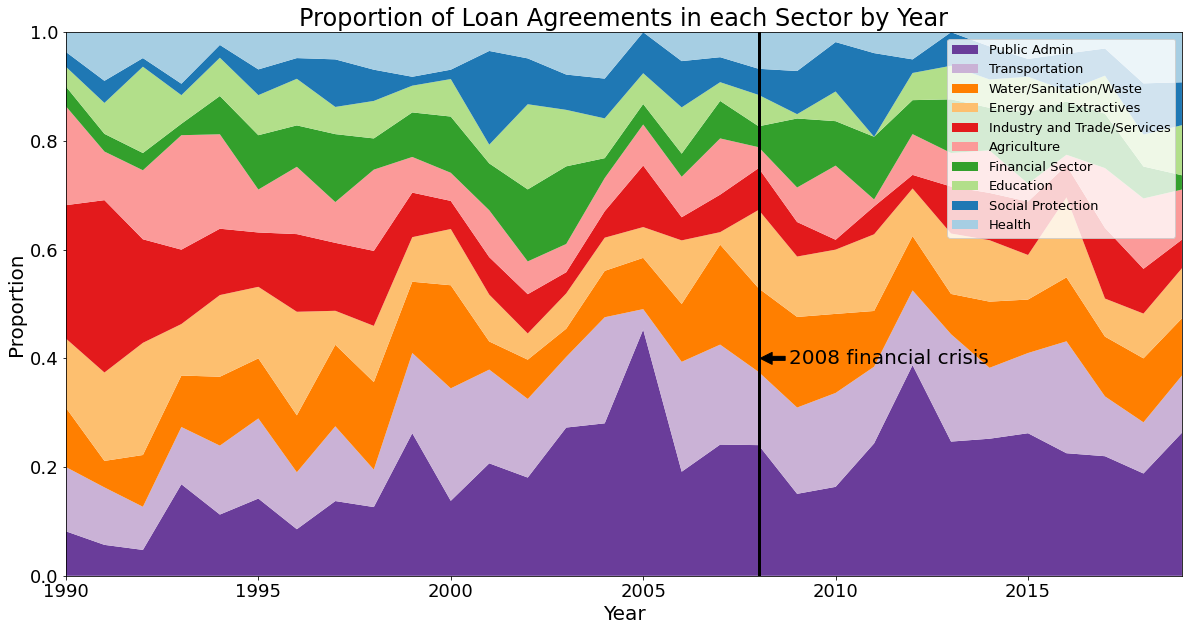

In [92]:
plt.figure(figsize=(20,10))
plt.stackplot(range(1990,2020),sector_prop_plot,colors=colorscheme,labels=sectors)
plt.plot([2008,2008],[0,1],linewidth=3,color='black')
plt.annotate('2008 financial crisis',
            xy=(2008, 0.4), xycoords='data',
            xytext=(30, 0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='center',fontsize=20)
plt.legend(fontsize=13)
plt.xlim((1990,2019))
plt.ylim((0,1))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Proportion",fontsize=20)

plt.title("Proportion of Loan Agreements in each Sector by Year",fontsize=24)
plt.savefig("sector_agreement_proportions.png",dpi=300,bbox_inches='tight')
plt.show()

In [49]:
sector_loan_amounts = agreements.groupby(['year','predicted_sector'])['amount_cur_usd'].sum()

In [67]:
years = range(1999,2020)
sector_amounts_plot = np.zeros((len(sectors),len(years)))
for i, sector in enumerate(sectors):
    for j, year in enumerate(years):
        if sector in sector_loan_amounts[year].index:
            sector_amounts_plot[i,j] = sector_loan_amounts[year][sector]
        else:
            sector_amounts_plot[i,j] = 0

In [68]:
sector_amounts_plot = sector_amounts_plot / 1e9

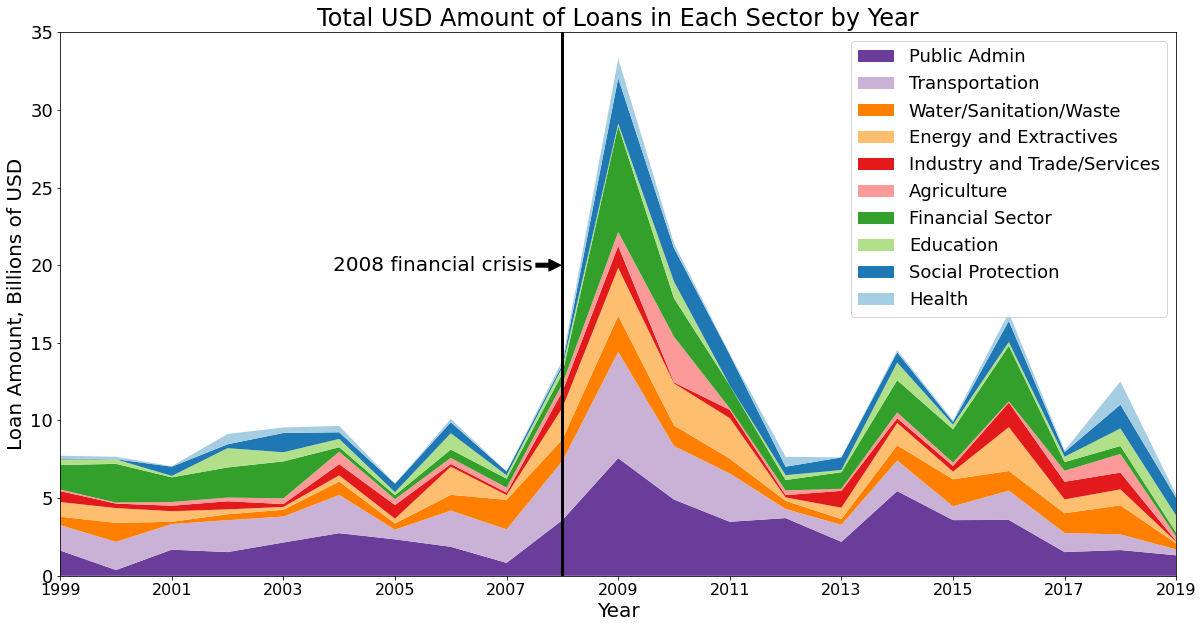

In [93]:
plt.figure(figsize=(20,10))
plt.stackplot(years,sector_amounts_plot,colors=colorscheme,labels=sectors)
plt.plot([2008,2008],[0,40],linewidth=3,color='black')
plt.annotate('2008 financial crisis',
            xy=(2008, 20), xycoords='data',
            xytext=(-30, 0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='center',fontsize=20)
plt.legend(fontsize=18)
plt.xlim((1999,2019))
plt.ylim((0,35))
plt.xticks([1999,2001,2003,2005,2007,2009,2011,2013,2015,2017,2019],fontsize=16)
plt.yticks(fontsize=18)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Loan Amount, Billions of USD",fontsize=20)
plt.title("Total USD Amount of Loans in Each Sector by Year",fontsize=24)
plt.savefig("sector_agreement_amounts.png",dpi=300,bbox_inches='tight')
plt.show()

In [94]:
sector_amounts_prop_plot = sector_amounts_plot / sector_amounts_plot.sum(axis=0)

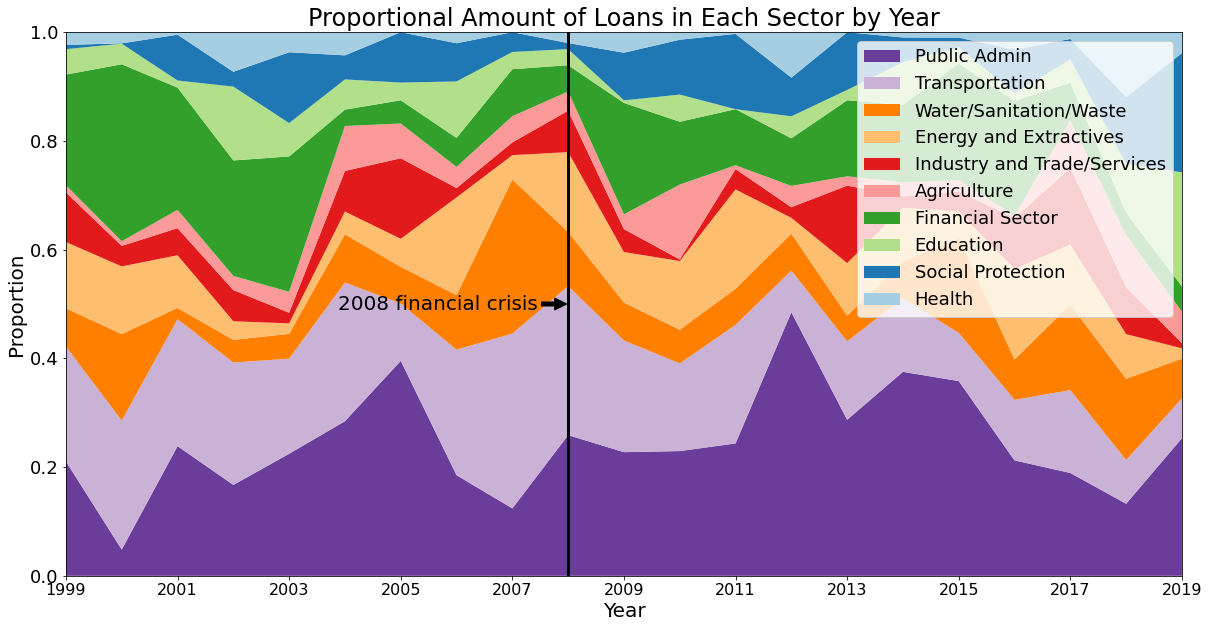

In [95]:
plt.figure(figsize=(20,10))
plt.stackplot(years,sector_amounts_prop_plot,colors=colorscheme,labels=sectors)
plt.plot([2008,2008],[0,1],linewidth=3,color='black')
plt.annotate('2008 financial crisis',
            xy=(2008, 0.5), xycoords='data',
            xytext=(-30, 0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='center',fontsize=20)
plt.legend(fontsize=18)
plt.xlim((1999,2019))
plt.ylim((0,1))
plt.xticks([1999,2001,2003,2005,2007,2009,2011,2013,2015,2017,2019],fontsize=16)
plt.yticks(fontsize=18)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Proportion",fontsize=20)
plt.title("Proportional Amount of Loans in Each Sector by Year",fontsize=24)
plt.savefig("sector_agreement_amounts_proportion.png",dpi=300,bbox_inches='tight')
plt.show()